#**Libraries**

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import copy
import math
import seaborn as sns
import numpy as np
import datetime
import statistics
import torch.nn as nn
import tensorflow as tf
import torch.optim as optim
from google.colab import drive
from sklearn.metrics import r2_score
from torch.utils.data import DataLoader, TensorDataset
from torch import nn, optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from torch.optim import SGD
from torch.utils.data import Dataset, random_split
from sklearn.utils import resample
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from numpy import vstack
from pandas import read_csv
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, average_precision_score
from sklearn.metrics import confusion_matrix, recall_score, f1_score
from torch.utils.data import Dataset
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Module
from torch.optim import SGD
from torch.nn import BCELoss
from torch.optim import lr_scheduler
from torch.nn.init import kaiming_uniform_
from torch.nn.init import xavier_uniform_

#**Loading Data**

In [ ]:
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/KaggleV2-May-2016.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df.shape

(110527, 14)

In [ ]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [ ]:
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [ ]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
df.describe(include='object')

,Gender,ScheduledDay,AppointmentDay,Neighbourhood,No-show
count,110527,110527,110527,110527,110527
unique,2,103549,27,81,2
top,F,2016-05-06T07:09:54Z,2016-06-06T00:00:00Z,JARDIM CAMBURI,No
freq,71840,24,4692,7717,88208


#**Preprocessing**

##*Exploring Data*

In [ ]:
processing_df = df.copy(deep=True)

In [ ]:
for column_name, unique_values in processing_df.items():
    print(column_name.ljust(15), unique_values.unique())

PatientId       [2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13]
AppointmentID   [5642903 5642503 5642549 ... 5630692 5630323 5629448]
Gender          ['F' 'M']
ScheduledDay    ['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']
AppointmentDay  ['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:00Z' '2016-06-06T00:00:00Z'
 '2016-06-07T00:00:00Z' '2016-06-01T00:00:00Z' '2016-0

In [ ]:
object_columns = [col for col in processing_df.columns if processing_df[col].dtype == 'object']
value_counts_dict = {col: processing_df[col].value_counts() for col in object_columns}
for col, value_counts in value_counts_dict.items():
    print(value_counts)

Gender
F    71840
M    38687
Name: count, dtype: int64
ScheduledDay
2016-05-06T07:09:54Z    24
2016-05-06T07:09:53Z    23
2016-04-25T17:18:27Z    22
2016-04-25T17:17:46Z    22
2016-04-25T17:17:23Z    19
                        ..
2016-05-02T09:53:25Z     1
2016-05-30T09:12:28Z     1
2016-05-16T09:10:04Z     1
2016-05-09T10:17:48Z     1
2016-04-27T13:30:56Z     1
Name: count, Length: 103549, dtype: int64
AppointmentDay
2016-06-06T00:00:00Z    4692
2016-05-16T00:00:00Z    4613
2016-05-09T00:00:00Z    4520
2016-05-30T00:00:00Z    4514
2016-06-08T00:00:00Z    4479
2016-05-11T00:00:00Z    4474
2016-06-01T00:00:00Z    4464
2016-06-07T00:00:00Z    4416
2016-05-12T00:00:00Z    4394
2016-05-02T00:00:00Z    4376
2016-05-18T00:00:00Z    4373
2016-05-17T00:00:00Z    4372
2016-06-02T00:00:00Z    4310
2016-05-10T00:00:00Z    4308
2016-05-31T00:00:00Z    4279
2016-05-05T00:00:00Z    4273
2016-05-19T00:00:00Z    4270
2016-05-03T00:00:00Z    4256
2016-05-04T00:00:00Z    4168
2016-06-03T00:00:00Z    409

##*Handling Missing Values*

In [ ]:
missing_values = processing_df.isnull().sum()
print("\nMissing values:")
print(missing_values)


Missing values:
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [ ]:
for col in processing_df.columns:
    if processing_df[col].dtype == 'object':
        processing_df[col].fillna(processing_df[col].mode()[0], inplace=True)
    else:
        processing_df[col].fillna(processing_df[col].mean(), inplace=True)

print("\nPreprocessed dataset:")
processing_df.head()


Preprocessed dataset:


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
processing_df['AppointmentDay'] = pd.to_datetime(processing_df['AppointmentDay'])
processing_df['AppointmentDay']

0        2016-04-29 00:00:00+00:00
1        2016-04-29 00:00:00+00:00
2        2016-04-29 00:00:00+00:00
3        2016-04-29 00:00:00+00:00
4        2016-04-29 00:00:00+00:00
                    ...           
110522   2016-06-07 00:00:00+00:00
110523   2016-06-07 00:00:00+00:00
110524   2016-06-07 00:00:00+00:00
110525   2016-06-07 00:00:00+00:00
110526   2016-06-07 00:00:00+00:00
Name: AppointmentDay, Length: 110527, dtype: datetime64[ns, UTC]

In [ ]:
processing_df['AppointmentDate'] = processing_df['AppointmentDay'].dt.strftime('%Y-%m-%d')
processing_df['AppointmentTime'] = processing_df['AppointmentDay'].dt.strftime('%H:%M:%S')
processing_df['AppointmentDate']

0         2016-04-29
1         2016-04-29
2         2016-04-29
3         2016-04-29
4         2016-04-29
             ...    
110522    2016-06-07
110523    2016-06-07
110524    2016-06-07
110525    2016-06-07
110526    2016-06-07
Name: AppointmentDate, Length: 110527, dtype: object

In [ ]:
processing_df['AppointmentTime']

0         00:00:00
1         00:00:00
2         00:00:00
3         00:00:00
4         00:00:00
            ...   
110522    00:00:00
110523    00:00:00
110524    00:00:00
110525    00:00:00
110526    00:00:00
Name: AppointmentTime, Length: 110527, dtype: object

In [ ]:
processing_df.drop(columns=['AppointmentDay'], inplace=True)
processing_df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentDate,AppointmentTime
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,00:00:00
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,00:00:00
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,00:00:00
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,00:00:00
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,00:00:00


In [ ]:
processing_df['ScheduledDay'] = pd.to_datetime(processing_df['ScheduledDay'])
processing_df['ScheduledDate'] = processing_df['ScheduledDay'].dt.strftime('%Y-%m-%d')
processing_df['ScheduledTime'] = processing_df['ScheduledDay'].dt.strftime('%H:%M:%S')

In [ ]:
processing_df.drop(columns=['ScheduledDay'], inplace=True)
processing_df.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentDate,AppointmentTime,ScheduledDate,ScheduledTime
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,00:00:00,2016-04-29,18:38:08
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,00:00:00,2016-04-29,16:08:27
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,00:00:00,2016-04-29,16:19:04
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,00:00:00,2016-04-29,17:29:31
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,00:00:00,2016-04-29,16:07:23


In [ ]:
missing_values = processing_df.isnull().sum()
print("\nMissing values:")
print(missing_values)


Missing values:
PatientId          0
AppointmentID      0
Gender             0
Age                0
Neighbourhood      0
Scholarship        0
Hipertension       0
Diabetes           0
Alcoholism         0
Handcap            0
SMS_received       0
No-show            0
AppointmentDate    0
AppointmentTime    0
ScheduledDate      0
ScheduledTime      0
dtype: int64


In [ ]:
print(processing_df['Age'].unique().tolist())

[62, 56, 8, 76, 23, 39, 21, 19, 30, 29, 22, 28, 54, 15, 50, 40, 46, 4, 13, 65, 45, 51, 32, 12, 61, 38, 79, 18, 63, 64, 85, 59, 55, 71, 49, 78, 31, 58, 27, 6, 2, 11, 7, 0, 3, 1, 69, 68, 60, 67, 36, 10, 35, 20, 26, 34, 33, 16, 42, 5, 47, 17, 41, 44, 37, 24, 66, 77, 81, 70, 53, 75, 73, 52, 74, 43, 89, 57, 14, 9, 48, 83, 72, 25, 80, 87, 88, 84, 82, 90, 94, 86, 91, 98, 92, 96, 93, 95, 97, 102, 115, 100, 99, -1]


In [ ]:
print(len(processing_df['Age'].unique().tolist()))

104


In [ ]:
valid_age_df = processing_df[(processing_df['Age'] != -1) & (processing_df['Age'] != 0)]
mean_of_valid_ages = valid_age_df['Age'].mean()
processing_df['Age'] = processing_df['Age'].replace({-1: round(mean_of_valid_ages), 0: round(mean_of_valid_ages)})
print((processing_df['Age'] == -1) | (processing_df['Age'] == 0))

0         False
1         False
2         False
3         False
4         False
          ...  
110522    False
110523    False
110524    False
110525    False
110526    False
Name: Age, Length: 110527, dtype: bool


In [ ]:
print(processing_df['Age'].unique().tolist())

[62, 56, 8, 76, 23, 39, 21, 19, 30, 29, 22, 28, 54, 15, 50, 40, 46, 4, 13, 65, 45, 51, 32, 12, 61, 38, 79, 18, 63, 64, 85, 59, 55, 71, 49, 78, 31, 58, 27, 6, 2, 11, 7, 3, 1, 69, 68, 60, 67, 36, 10, 35, 20, 26, 34, 33, 16, 42, 5, 47, 17, 41, 44, 37, 24, 66, 77, 81, 70, 53, 75, 73, 52, 74, 43, 89, 57, 14, 9, 48, 83, 72, 25, 80, 87, 88, 84, 82, 90, 94, 86, 91, 98, 92, 96, 93, 95, 97, 102, 115, 100, 99]


In [ ]:
print(len(processing_df['Age'].unique().tolist()))

102


In [ ]:
processing_df = processing_df.drop(['PatientId','AppointmentID'],axis=1)

##*Visualization Of Imbalance Classes*

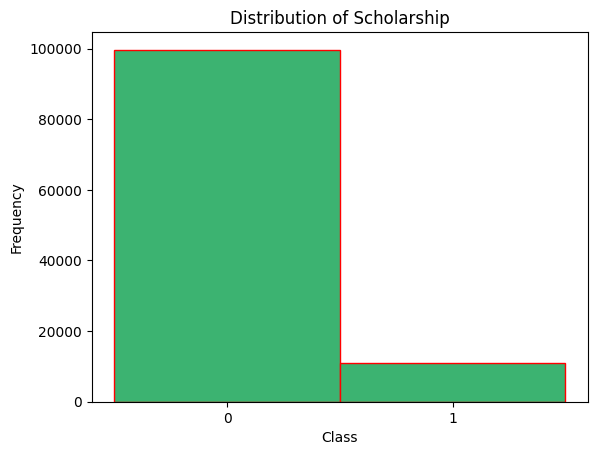

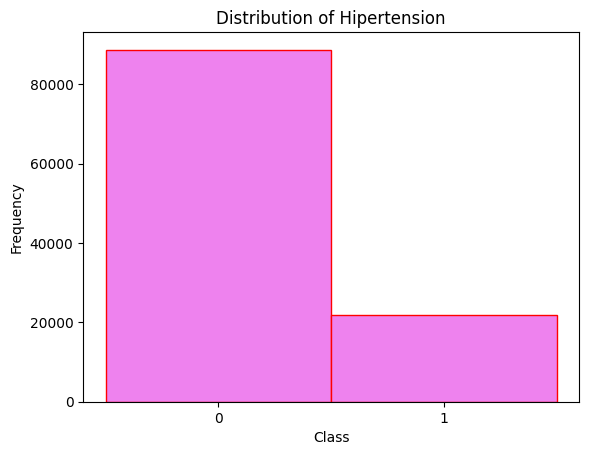

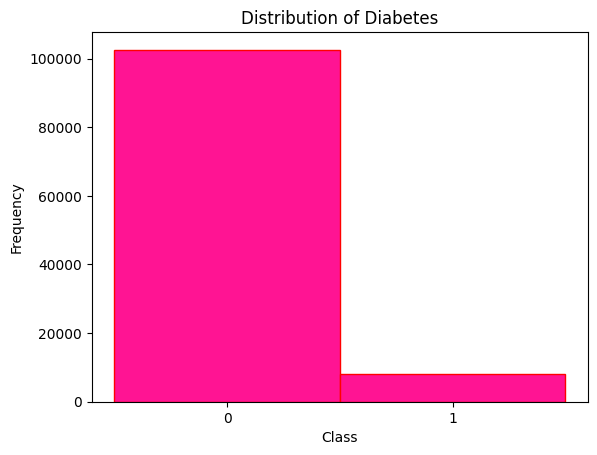

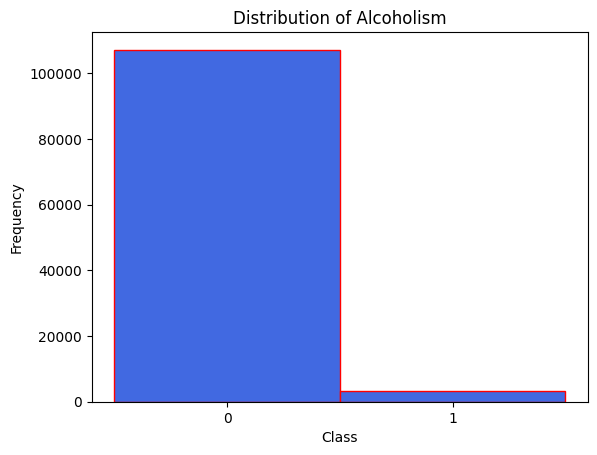

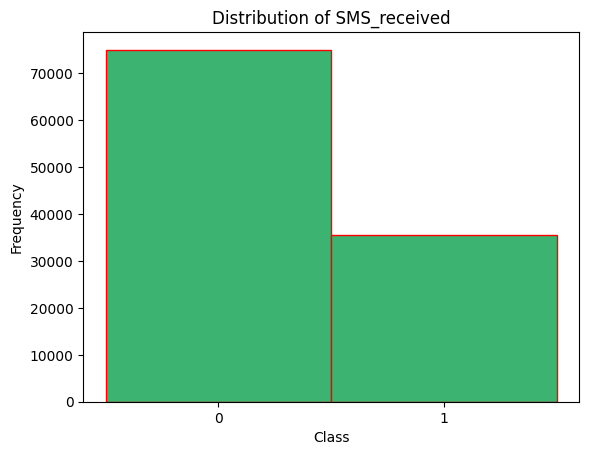

In [ ]:
colors = ['DeepPink', 'RoyalBlue', 'DarkOrchid','MediumSeaGreen','violet']
for i, column in enumerate(processing_df):
    unique_values = processing_df[column].dropna().unique()
    if np.isin(unique_values, [0, 1]).all():
        plt.hist(processing_df[column], bins=[-0.5, 0.5, 1.5], color=colors[i % len(colors)], edgecolor='red')
        plt.xlabel("Class")
        plt.ylabel("Frequency")
        plt.title("Distribution of " + column)
        plt.xticks([0, 1], ["0", "1"])
        plt.show()


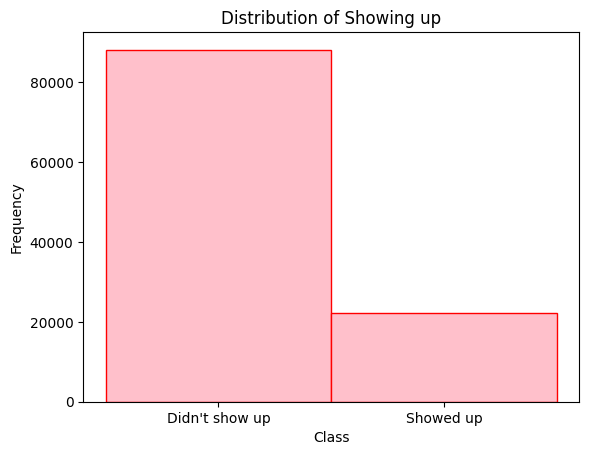

In [ ]:
plt.hist(processing_df['No-show'], bins=[-0.5,0.5,1.5] ,color='pink', edgecolor='red')
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Distribution of Showing up")
plt.xticks([0, 1], ["Didn't show up", "Showed up"])
plt.show()

#**New Feature**

In [ ]:
feature_df = processing_df.copy(deep=True)

In [ ]:
AppointmentDate = pd.to_datetime(feature_df['AppointmentDate'])
ScheduledDate = pd.to_datetime(feature_df['ScheduledDate'])
feature_df['TimeDifference'] = (AppointmentDate -ScheduledDate).dt.days

In [ ]:
for column_name, unique_values in feature_df.items():
    print(column_name.ljust(15), unique_values.unique())

Gender          ['F' 'M']
Age             [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   3   1  69  68  60  67  36  10  35  20  26
  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75  73
  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90  94
  86  91  98  92  96  93  95  97 102 115 100  99]
Neighbourhood   ['JARDIM DA PENHA' 'MATA DA PRAIA' 'PONTAL DE CAMBURI' 'REPÚBLICA'
 'GOIABEIRAS' 'ANDORINHAS' 'CONQUISTA' 'NOVA PALESTINA' 'DA PENHA'
 'TABUAZEIRO' 'BENTO FERREIRA' 'SÃO PEDRO' 'SANTA MARTHA' 'SÃO CRISTÓVÃO'
 'MARUÍPE' 'GRANDE VITÓRIA' 'SÃO BENEDITO' 'ILHA DAS CAIEIRAS'
 'SANTO ANDRÉ' 'SOLON BORGES' 'BONFIM' 'JARDIM CAMBURI' 'MARIA ORTIZ'
 'JABOUR' 'ANTÔNIO HONÓRIO' 'RESISTÊNCIA' 'ILHA DE SANTA MARIA'
 'JUCUTUQUARA' 'MONTE BELO' 'MÁRIO CYPRESTE' 'SANTO ANTÔNIO' 'BELA VISTA'
 'PRAIA DO SUÁ' 'SANTA HELENA' 'ITARARÉ' 'INHANG

In [ ]:
desired_row = feature_df[(feature_df['TimeDifference'] == -6) | (feature_df['TimeDifference'] == -1)].head()
desired_row


,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentDate,AppointmentTime,ScheduledDate,ScheduledTime,TimeDifference
27033,M,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,2016-05-09,00:00:00,2016-05-10,10:51:53,-1
55226,F,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,2016-05-17,00:00:00,2016-05-18,14:50:41,-1
64175,F,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,2016-05-04,00:00:00,2016-05-05,13:43:58,-1
71533,F,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,2016-05-05,00:00:00,2016-05-11,13:49:20,-6
72362,M,7,TABUAZEIRO,0,0,0,0,0,0,Yes,2016-05-03,00:00:00,2016-05-04,06:50:57,-1


In [ ]:
feature_df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentDate,AppointmentTime,ScheduledDate,ScheduledTime,TimeDifference
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No,2016-04-29,00:00:00,2016-04-29,18:38:08,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No,2016-04-29,00:00:00,2016-04-29,16:08:27,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No,2016-04-29,00:00:00,2016-04-29,16:19:04,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,2016-04-29,00:00:00,2016-04-29,17:29:31,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No,2016-04-29,00:00:00,2016-04-29,16:07:23,0


In [ ]:
feature_df.tail()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentDate,AppointmentTime,ScheduledDate,ScheduledTime,TimeDifference
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,No,2016-06-07,00:00:00,2016-05-03,09:15:35,35
110523,F,51,MARIA ORTIZ,0,0,0,0,0,1,No,2016-06-07,00:00:00,2016-05-03,07:27:33,35
110524,F,21,MARIA ORTIZ,0,0,0,0,0,1,No,2016-06-07,00:00:00,2016-04-27,16:03:52,41
110525,F,38,MARIA ORTIZ,0,0,0,0,0,1,No,2016-06-07,00:00:00,2016-04-27,15:09:23,41
110526,F,54,MARIA ORTIZ,0,0,0,0,0,1,No,2016-06-07,00:00:00,2016-04-27,13:30:56,41


#**Encoding**

In [ ]:
encode_df = feature_df.copy(deep=True)

In [ ]:
encode_df.shape

(110527, 15)

In [ ]:
encode_df['No-show'].replace({'Yes': 1, 'No': 0}, inplace=True)
encode_df['Gender'].replace({'F': 1, 'M': 0}, inplace=True)
encode_df.head()

,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,AppointmentDate,AppointmentTime,ScheduledDate,ScheduledTime,TimeDifference
0,1,62,JARDIM DA PENHA,0,1,0,0,0,0,0,2016-04-29,00:00:00,2016-04-29,18:38:08,0
1,0,56,JARDIM DA PENHA,0,0,0,0,0,0,0,2016-04-29,00:00:00,2016-04-29,16:08:27,0
2,1,62,MATA DA PRAIA,0,0,0,0,0,0,0,2016-04-29,00:00:00,2016-04-29,16:19:04,0
3,1,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,2016-04-29,00:00:00,2016-04-29,17:29:31,0
4,1,56,JARDIM DA PENHA,0,1,1,0,0,0,0,2016-04-29,00:00:00,2016-04-29,16:07:23,0


In [ ]:
encoded_df = pd.get_dummies(encode_df, columns=['AppointmentDate', 'Neighbourhood', 'ScheduledDate'], dtype=int)
encoded_df = encoded_df.drop(columns=['ScheduledTime', 'AppointmentTime'], axis=1)
encoded_df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,TimeDifference,...,ScheduledDate_2016-05-25,ScheduledDate_2016-05-30,ScheduledDate_2016-05-31,ScheduledDate_2016-06-01,ScheduledDate_2016-06-02,ScheduledDate_2016-06-03,ScheduledDate_2016-06-04,ScheduledDate_2016-06-06,ScheduledDate_2016-06-07,ScheduledDate_2016-06-08
0,1,62,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,56,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,62,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,8,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,56,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
encoded_df.shape

(110527, 229)

#**Scaling**

In [ ]:
scaled_df = encoded_df.copy(deep=True)

In [ ]:
for column_name, unique_values in scaled_df.items():
    print(column_name.ljust(15), unique_values.unique())

Gender          [1 0]
Age             [ 62  56   8  76  23  39  21  19  30  29  22  28  54  15  50  40  46   4
  13  65  45  51  32  12  61  38  79  18  63  64  85  59  55  71  49  78
  31  58  27   6   2  11   7   3   1  69  68  60  67  36  10  35  20  26
  34  33  16  42   5  47  17  41  44  37  24  66  77  81  70  53  75  73
  52  74  43  89  57  14   9  48  83  72  25  80  87  88  84  82  90  94
  86  91  98  92  96  93  95  97 102 115 100  99]
Scholarship     [0 1]
Hipertension    [1 0]
Diabetes        [0 1]
Alcoholism      [0 1]
Handcap         [0 1 2 3 4]
SMS_received    [0 1]
No-show         [0 1]
TimeDifference  [  0   2   3   1   4   9  29  10  23  11  18  17  14  28  24  21  15  16
  22  43  30  31  42  32  56  45  46  39  37  38  44  50  60  52  53  65
  67  91  66  84  78  87 115 109  63  70  72  57  58  51  59  41  49  73
  64  20  33  34   6  35  36  12  13  40  47   8   5   7  25  26  48  27
  19  61  55  62 176  54  77  69  83  76  89  81 103  79  68  75  85 112
  -1  

In [ ]:
scaled_df.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,TimeDifference,...,ScheduledDate_2016-05-25,ScheduledDate_2016-05-30,ScheduledDate_2016-05-31,ScheduledDate_2016-06-01,ScheduledDate_2016-06-02,ScheduledDate_2016-06-03,ScheduledDate_2016-06-04,ScheduledDate_2016-06-06,ScheduledDate_2016-06-07,ScheduledDate_2016-06-08
0,1,1.071960,0,1,0,0,0,0,0,-0.667568,...,0,0,0,0,0,0,0,0,0,0
1,0,0.800509,0,0,0,0,0,0,0,-0.667568,...,0,0,0,0,0,0,0,0,0,0
2,1,1.071960,0,0,0,0,0,0,0,-0.667568,...,0,0,0,0,0,0,0,0,0,0
3,1,-1.371095,0,0,0,0,0,0,0,-0.667568,...,0,0,0,0,0,0,0,0,0,0
4,1,0.800509,0,1,1,0,0,0,0,-0.667568,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(scaled_df[['Age', 'TimeDifference']])
scaled_df[['Age', 'TimeDifference']] = pd.DataFrame(scaled_features, columns=['Age', 'TimeDifference'])

In [ ]:
for column_name, unique_values in scaled_df.items():
    print(column_name.ljust(15), unique_values.unique())

Gender          [1 0]
Age             [ 1.07195988  0.80050935 -1.37109488  1.70534445 -0.69246855  0.03139952
 -0.78295206 -0.87343557 -0.37577627 -0.42101803 -0.73771031 -0.46625978
  0.71002584 -1.05440259  0.52905882  0.07664128  0.34809181 -1.55206189
 -1.1448861   1.20768515  0.30285005  0.57430058 -0.28529276 -1.19012786
  1.02671813 -0.01384223  1.84106971 -0.91867733  1.11720164  1.16244339
  2.11252024  0.93623462  0.7552676   1.47913567  0.48381707  1.79582796
 -0.33053452  0.89099286 -0.51150153 -1.46157838 -1.6425454  -1.23536961
 -1.41633663 -1.59730365 -1.68778716  1.38865217  1.34341041  0.98147637
  1.29816866 -0.10432574 -1.28061137 -0.1495675  -0.82819382 -0.55674329
 -0.19480925 -0.24005101 -1.00916084  0.16712479 -1.50682014  0.39333356
 -0.96391908  0.12188303  0.2576083  -0.05908399 -0.6472268   1.2529269
  1.7505862   1.93155322  1.43389392  0.66478409  1.66010269  1.56961918
  0.61954233  1.61486094  0.21236654  2.29348726  0.84575111 -1.09964435
 -1.32585312  

#**Sampling Data**

In [ ]:
sample_df = scaled_df.copy(deep=True)

In [ ]:
df_minor = sample_df[sample_df['No-show'] == 1]
df_major = sample_df[sample_df['No-show'] == 0]

In [ ]:
df_minor

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,TimeDifference,...,ScheduledDate_2016-05-25,ScheduledDate_2016-05-30,ScheduledDate_2016-05-31,ScheduledDate_2016-06-01,ScheduledDate_2016-06-02,ScheduledDate_2016-06-03,ScheduledDate_2016-06-04,ScheduledDate_2016-06-06,ScheduledDate_2016-06-07,ScheduledDate_2016-06-08
6,1,-0.692469,0,0,0,0,0,0,1,-0.536463,...,0,0,0,0,0,0,0,0,0,0
7,1,0.031400,0,0,0,0,0,0,1,-0.536463,...,0,0,0,0,0,0,0,0,0,0
11,0,-0.421018,0,0,0,0,0,1,1,-0.470910,...,0,0,0,0,0,0,0,0,0,0
17,1,0.076641,1,0,0,0,0,0,1,-0.602015,...,0,0,0,0,0,0,0,0,0,0
20,1,-0.375776,0,0,0,0,0,0,1,-0.536463,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110484,1,0.302850,0,0,0,0,0,0,1,-0.405358,...,0,0,0,0,0,1,0,0,0,0
110492,0,-0.240051,0,1,0,0,0,0,1,-0.667568,...,0,0,0,0,0,0,0,0,0,1
110496,1,-0.059084,0,1,0,0,0,0,1,-0.536463,...,0,0,0,0,0,0,0,1,0,0
110515,0,-0.240051,0,1,0,0,0,0,1,-0.536463,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
df_minor.shape

(22319, 229)

In [ ]:
df_major

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,TimeDifference,...,ScheduledDate_2016-05-25,ScheduledDate_2016-05-30,ScheduledDate_2016-05-31,ScheduledDate_2016-06-01,ScheduledDate_2016-06-02,ScheduledDate_2016-06-03,ScheduledDate_2016-06-04,ScheduledDate_2016-06-06,ScheduledDate_2016-06-07,ScheduledDate_2016-06-08
0,1,1.071960,0,1,0,0,0,0,0,-0.667568,...,0,0,0,0,0,0,0,0,0,0
1,0,0.800509,0,0,0,0,0,0,0,-0.667568,...,0,0,0,0,0,0,0,0,0,0
2,1,1.071960,0,0,0,0,0,0,0,-0.667568,...,0,0,0,0,0,0,0,0,0,0
3,1,-1.371095,0,0,0,0,0,0,0,-0.667568,...,0,0,0,0,0,0,0,0,0,0
4,1,0.800509,0,1,1,0,0,0,0,-0.667568,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,1,0.800509,0,0,0,0,0,1,0,1.626773,...,0,0,0,0,0,0,0,0,0,0
110523,1,0.574301,0,0,0,0,0,1,0,1.626773,...,0,0,0,0,0,0,0,0,0,0
110524,1,-0.782952,0,0,0,0,0,1,0,2.020088,...,0,0,0,0,0,0,0,0,0,0
110525,1,-0.013842,0,0,0,0,0,1,0,2.020088,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_major.shape

(88208, 229)

In [ ]:
df_major_resampled = resample(df_major, replace=True, n_samples=df_minor.shape[0], random_state=42)
df_major_resampled

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,TimeDifference,...,ScheduledDate_2016-05-25,ScheduledDate_2016-05-30,ScheduledDate_2016-05-31,ScheduledDate_2016-06-01,ScheduledDate_2016-06-02,ScheduledDate_2016-06-03,ScheduledDate_2016-06-04,ScheduledDate_2016-06-06,ScheduledDate_2016-06-07,ScheduledDate_2016-06-08
19786,0,-1.552062,0,0,0,0,0,1,0,1.430115,...,0,0,0,0,0,0,0,0,0,0
1040,1,-1.552062,0,0,0,0,0,1,0,0.709036,...,0,0,0,0,0,0,0,0,0,0
96360,1,-0.963919,0,0,0,0,0,1,0,1.233457,...,0,0,0,0,0,0,0,0,0,0
69612,1,1.479136,0,0,1,0,0,0,0,-0.667568,...,0,0,0,0,0,0,0,0,0,0
7910,0,-0.013842,0,0,0,0,0,0,0,-0.667568,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11278,1,0.438575,0,0,0,0,0,0,0,1.561220,...,0,0,0,0,0,0,0,0,0,0
10203,0,-1.506820,0,0,0,0,0,0,0,-0.667568,...,0,0,0,0,0,0,0,0,0,0
32763,0,-0.692469,0,0,0,0,1,0,0,1.167905,...,0,0,0,0,0,0,0,0,0,0
93445,0,-1.325853,0,0,0,0,0,0,0,-0.667568,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df_sample = pd.concat([df_major_resampled, df_minor])
df_sample = df_sample.sample(frac=1, random_state=42)
df_sample.head()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,TimeDifference,...,ScheduledDate_2016-05-25,ScheduledDate_2016-05-30,ScheduledDate_2016-05-31,ScheduledDate_2016-06-01,ScheduledDate_2016-06-02,ScheduledDate_2016-06-03,ScheduledDate_2016-06-04,ScheduledDate_2016-06-06,ScheduledDate_2016-06-07,ScheduledDate_2016-06-08
37152,1,-0.918677,0,0,0,0,0,0,0,1.233457,...,0,0,0,0,0,0,0,0,0,0
49404,1,1.343410,1,1,0,0,0,1,0,0.577931,...,0,0,0,0,0,0,0,0,0,0
45182,0,1.750586,0,1,0,0,0,0,1,0.250168,...,0,0,0,0,0,0,0,0,0,0
95633,0,1.524377,0,1,0,0,1,0,0,-0.536463,...,0,1,0,0,0,0,0,0,0,0
21541,1,0.121883,0,0,0,0,0,0,1,-0.274252,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_sample.tail()

,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,TimeDifference,...,ScheduledDate_2016-05-25,ScheduledDate_2016-05-30,ScheduledDate_2016-05-31,ScheduledDate_2016-06-01,ScheduledDate_2016-06-02,ScheduledDate_2016-06-03,ScheduledDate_2016-06-04,ScheduledDate_2016-06-06,ScheduledDate_2016-06-07,ScheduledDate_2016-06-08
67159,1,0.800509,0,0,0,0,0,0,0,-0.667568,...,0,0,0,0,0,0,0,0,0,0
27498,1,0.529059,0,0,0,0,0,0,0,8.050927,...,0,0,0,0,0,0,0,0,0,0
76147,1,0.483817,0,0,0,0,0,1,1,-0.470910,...,0,0,0,0,0,0,0,0,0,0
7866,0,-1.371095,0,0,0,0,0,1,0,-0.012042,...,0,0,0,0,0,0,0,0,0,0
56362,1,-0.963919,0,0,0,0,0,0,0,-0.667568,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_sample.shape

(44638, 229)

#**Training Model**

In [ ]:
test_df = df_sample.copy(deep=True)

In [ ]:
test_df.to_csv('/content/drive/MyDrive/file.csv')
new_df = pd.read_csv('/content/drive/MyDrive/file.csv', skiprows=1)
new_df = new_df.iloc[:, 1:]
new_df.to_csv('/content/drive/MyDrive/file.csv', index=False)

In [ ]:
new_df.head()

,1,-0.9186773276490406,0,0.1,0.2,0.3,0.4,0.5,0.6,1.2334570998925698,...,0.213,0.214,0.215,0.216,0.217,0.218,0.219,0.220,0.221,0.222
0,1,1.343410,1,1,0,0,0,1,0,0.577931,...,0,0,0,0,0,0,0,0,0,0
1,0,1.750586,0,1,0,0,0,0,1,0.250168,...,0,0,0,0,0,0,0,0,0,0
2,0,1.524377,0,1,0,0,1,0,0,-0.536463,...,0,1,0,0,0,0,0,0,0,0
3,1,0.121883,0,0,0,0,0,0,1,-0.274252,...,0,0,0,0,0,0,0,0,0,0
4,1,-1.687787,0,0,0,0,0,0,1,0.709036,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def preprocess_data(path, split_ratio=0.2):
    df = pd.read_csv(path, header=None)
    del df[df.columns[0]]
    X = df.iloc[:, :-1].values.astype('float32')
    y = df.iloc[:, -1].values.astype('float32').reshape((-1, 1))
    test_size = round(split_ratio * len(X))
    train_size = len(X) - test_size
    indices = np.arange(len(X))
    np.random.shuffle(indices)
    train_indices, test_indices = indices[:train_size], indices[train_size:]
    train_X, train_y = X[train_indices], y[train_indices]
    test_X, test_y = X[test_indices], y[test_indices]
    return (train_X, train_y), (test_X, test_y)

In [ ]:
(train_X, train_y), (test_X, test_y) = preprocess_data('/content/drive/MyDrive/file.csv', 0.2)
print("Shape of X_train:", train_X.shape)
print("Shape of y_train:", train_y.shape)
print("Shape of X_test:", test_X.shape)
print("Shape of y_test:", test_y.shape)
train_data = list(zip(train_X, train_y))
test_data = list(zip(test_X, test_y))
train_dl = DataLoader(train_data, batch_size=32, shuffle=True)
test_dl = DataLoader(test_data, batch_size=1024, shuffle=False)

Shape of X_train: (35710, 227)
Shape of y_train: (35710, 1)
Shape of X_test: (8928, 227)
Shape of y_test: (8928, 1)


In [ ]:
train_y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
test_y

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
class mlp(Module):
    def __init__(self, n_inputs):
        super(mlp, self).__init__()
        self.hidden1 = Linear(n_inputs, 20)
        kaiming_uniform_(self.hidden1.weight, nonlinearity='relu')
        self.act1 = ReLU()
        self.hidden2 = Linear(20, 10)
        kaiming_uniform_(self.hidden2.weight, nonlinearity='relu')
        self.act2 = ReLU()
        self.hidden3 = Linear(10,1)
        xavier_uniform_(self.hidden3.weight)
        self.act3 = Sigmoid()
    def forward(self, X):
        X = self.hidden1(X)
        X = self.act1(X)
        X = self.hidden2(X)
        X = self.act2(X)
        X = self.hidden3(X)
        X = self.act3(X)
        return X

In [ ]:
model = mlp(227)
criterion = BCELoss()
optimizer = SGD(model.parameters(), lr=0.01, momentum=0.)

In [ ]:
epoch_loss_list = []
epoch_acc_list = []
epoch_list = []
epochs = 80
loss = 0.0

for epoch in range(epochs):
      model.train()
      running_loss = 0.0
      correct = 0
      total = 0

      for i, (inputs, targets) in enumerate(train_dl):
          optimizer.zero_grad()
          outputs = model(inputs)
          _, preds = torch.max(outputs.data,1)
          loss = criterion(outputs, targets)
          loss.backward()
          optimizer.step()
          running_loss += loss.item() * inputs.size(0)
          total += targets.size(0)
          correct += (preds == targets).sum().item()
      epoch_loss = running_loss / total
      epoch_acc = correct / total
      epoch_loss_list.append(epoch_loss)
      epoch_acc_list.append(epoch_acc)
      epoch_list.append(epoch)
      print('Epoch {}'.format(epoch+1))
      print('Loss: {:.4f} Accuracy: {:.4f}'.format(epoch_loss, epoch_acc))
      print("_____________________________________")

Epoch 1
Loss: 0.0966 Accuracy: 31.6838
_____________________________________
Epoch 2
Loss: 0.0413 Accuracy: 31.6838
_____________________________________
Epoch 3
Loss: 0.0348 Accuracy: 31.6838
_____________________________________
Epoch 4
Loss: 0.0294 Accuracy: 31.6838
_____________________________________
Epoch 5
Loss: 0.0251 Accuracy: 31.6838
_____________________________________
Epoch 6
Loss: 0.0216 Accuracy: 31.6838
_____________________________________
Epoch 7
Loss: 0.0187 Accuracy: 31.6838
_____________________________________
Epoch 8
Loss: 0.0167 Accuracy: 31.6838
_____________________________________
Epoch 9
Loss: 0.0155 Accuracy: 31.6838
_____________________________________
Epoch 10
Loss: 0.0146 Accuracy: 31.6838
_____________________________________
Epoch 11
Loss: 0.0138 Accuracy: 31.6838
_____________________________________
Epoch 12
Loss: 0.0132 Accuracy: 31.6838
_____________________________________
Epoch 13
Loss: 0.0126 Accuracy: 31.6838
_________________________________

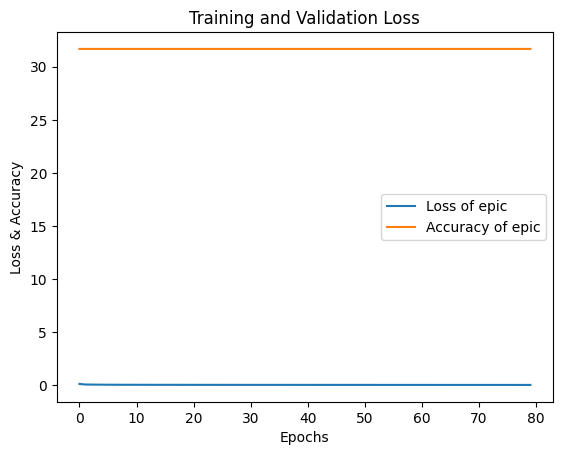

In [ ]:
plt.plot(epoch_loss_list, label='Loss of epic')
plt.plot(epoch_acc_list, label='Accuracy of epic')
plt.xlabel('Epochs')
plt.ylabel('Loss & Accuracy')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

#**Model Evaluation**

In [ ]:
y_preds = []
y_acts = []

for (i, (inputs, targets)) in enumerate(test_dl):
    y_predicted = model(inputs)
    y_predicted = y_predicted.detach().numpy()
    y_true = targets.numpy()
    y_true = y_true.reshape((len(y_true), 1))
    y_predicted = y_predicted.round()
    y_preds.append(y_predicted)
    y_acts.append(y_true)


In [ ]:
y_preds, y_acts = vstack(y_preds), vstack(y_acts)
cm = confusion_matrix(y_acts, y_preds)
tn, fp, fn, tp = cm.ravel()
total = sum(cm.ravel())

evaluations = {
        'Accuracy': accuracy_score(y_acts, y_preds),
        'F1 Score': f1_score(y_acts, y_preds),
        'Precision': precision_score(y_acts, y_preds),
        'Average Precision Score': average_precision_score(y_acts, y_preds),
        'Recall': recall_score(y_acts, y_preds),
        'True Positive Rate':recall_score(y_acts, y_preds),
        'False Positive Rate':fp / (fp + tn) ,
        'Misclassification Rate': (fp+fn)/total ,
        'Sensitivity': tp / (tp + fn),
        'Specificity': tn / (tn + fp),
}

In [ ]:
evaluations

{'Accuracy': 1.0,
 'F1 Score': 1.0,
 'Precision': 1.0,
 'Average Precision Score': 1.0,
 'Recall': 1.0,
 'True Positive Rate': 1.0,
 'False Positive Rate': 0.0,
 'Misclassification Rate': 0.0,
 'Sensitivity': 1.0,
 'Specificity': 1.0}